In [1]:
import sys
sys.path.insert(0,"../")
from fileio.readbyu import *
from registration.register import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


## Generate target and template triangulated meshes

In [2]:
# load a pre-made mesh
faces_target, vertices_target, _, _ = readbyu("../data/pyramid.byu")

# rotate the pre-made mesh and recover the original
theta_x_template = 0.5
theta_y_template = 0.6
theta_z_template = -0.3
Rx_template = np.array([[1,0,0],[0,np.cos(theta_x_template),-np.sin(theta_x_template)],[0,np.sin(theta_x_template),np.cos(theta_x_template)]])
Ry_template = np.array([[np.cos(theta_y_template),0,np.sin(theta_y_template)],[0,1,0],[-np.sin(theta_y_template),0,np.cos(theta_y_template)]])
Rz_template = np.array([[np.cos(theta_z_template),-np.sin(theta_z_template),0],[np.sin(theta_z_template),np.cos(theta_z_template),0],[0,0,1]])
R_template = np.matmul(np.matmul(Rx_template,Ry_template),Rz_template)
vertices_template = rigid(torch.Tensor(vertices_target).type(torch.FloatTensor),torch.Tensor(R_template).type(torch.FloatTensor),torch.Tensor([[0,0,0]]).reshape((1,3)),torch.Tensor([[0,0,0]]).reshape((3,1))).detach().cpu().numpy()
faces_template = np.copy(faces_target)

## Draw the initial state of the surfaces

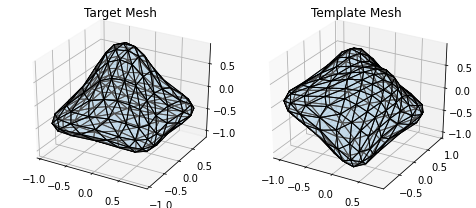

In [3]:
fig = plt.figure(figsize=(10, 3))

#----------------------------------------1
ax = fig.add_subplot(131, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(vertices_target[faces_target])
#mesh.set_edgecolor('face')
mesh.set_alpha(0.3)
ax.add_collection3d(mesh)

ax.set_xlim(np.mean(vertices_target,axis=0)[0]-1,np.mean(vertices_target,axis=0)[0]+1)
ax.set_ylim(np.mean(vertices_target,axis=0)[1]-1,np.mean(vertices_target,axis=0)[1]+1)
ax.set_zlim(np.mean(vertices_target,axis=0)[2]-1,np.mean(vertices_target,axis=0)[2]+1)

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(vertices_target[faces_target])
mesh.set_edgecolor('k')
mesh.set_facecolor('w')
mesh.set_alpha(0.3)
ax.add_collection3d(mesh)
ax.set_title("Target Mesh")
plt.tight_layout()
#----------------------------------------1
ax = fig.add_subplot(132, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(vertices_template[faces_template])
#mesh.set_edgecolor('face')
mesh.set_alpha(0.3)
ax.add_collection3d(mesh)

ax.set_xlim(np.mean(vertices_template,axis=0)[0]-1,np.mean(vertices_template,axis=0)[0]+1)
ax.set_ylim(np.mean(vertices_template,axis=0)[1]-1,np.mean(vertices_template,axis=0)[1]+1)
ax.set_zlim(np.mean(vertices_template,axis=0)[2]-1,np.mean(vertices_template,axis=0)[2]+1)

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(vertices_template[faces_template])
mesh.set_edgecolor('k')
mesh.set_facecolor('w')
mesh.set_alpha(0.3)
ax.add_collection3d(mesh)
ax.set_title("Template Mesh")
plt.tight_layout()

## Rigid registration

In [4]:
vertices_deformed, params = register_rigid(faces_template,vertices_template,faces_target,vertices_target,niter=500,sigma=2)

## Draw the output of registration

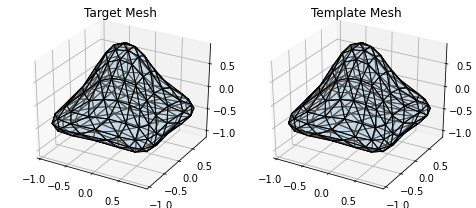

In [5]:
fig = plt.figure(figsize=(10, 3))

#----------------------------------------1
ax = fig.add_subplot(131, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(vertices_target[faces_target])
#mesh.set_edgecolor('face')
mesh.set_alpha(0.3)
ax.add_collection3d(mesh)

ax.set_xlim(np.mean(vertices_target,axis=0)[0]-1,np.mean(vertices_target,axis=0)[0]+1)
ax.set_ylim(np.mean(vertices_target,axis=0)[1]-1,np.mean(vertices_target,axis=0)[1]+1)
ax.set_zlim(np.mean(vertices_target,axis=0)[2]-1,np.mean(vertices_target,axis=0)[2]+1)

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(vertices_target[faces_target])
mesh.set_edgecolor('k')
mesh.set_facecolor('w')
mesh.set_alpha(0.3)
ax.add_collection3d(mesh)
ax.set_title("Target Mesh")
plt.tight_layout()
#----------------------------------------1
ax = fig.add_subplot(132, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(vertices_deformed[faces_template])
#mesh.set_edgecolor('face')
mesh.set_alpha(0.3)
ax.add_collection3d(mesh)

ax.set_xlim(np.mean(vertices_deformed,axis=0)[0]-1,np.mean(vertices_deformed,axis=0)[0]+1)
ax.set_ylim(np.mean(vertices_deformed,axis=0)[1]-1,np.mean(vertices_deformed,axis=0)[1]+1)
ax.set_zlim(np.mean(vertices_deformed,axis=0)[2]-1,np.mean(vertices_deformed,axis=0)[2]+1)

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(vertices_deformed[faces_template])
mesh.set_edgecolor('k')
mesh.set_facecolor('w')
mesh.set_alpha(0.3)
ax.add_collection3d(mesh)
ax.set_title("Template Mesh")
plt.tight_layout()